In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
titanic_train = pd.read_csv("./data.csv")      # Read the data

In [3]:
titanic_train.shape # Check dimensions

(891, 12)

In [4]:
titanic_train.head(5)  # Check the first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
categorical = titanic_train.dtypes[titanic_train.dtypes == "object"].index
print(categorical)

titanic_train[categorical].describe()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
titanic_train["Ticket"][0:15]       # Check the first 15 tickets

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object

In [7]:
titanic_train["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [8]:
del titanic_train["Ticket"]        # Remove Ticket

In [9]:
new_Pclass = pd.Categorical(titanic_train["Pclass"],
                           ordered=True)

new_Pclass = new_Pclass.rename_categories(["Class1","Class2","Class3"])     

new_Pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [10]:
titanic_train["Pclass"] = new_Pclass

In [11]:
titanic_train["Cabin"].unique()   # Check unique cabins

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [12]:
char_cabin = titanic_train["Cabin"].astype(str) # Convert data to str

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter

new_Cabin = pd.Categorical(new_Cabin)

new_Cabin .describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [13]:
titanic_train["Cabin"] = new_Cabin

In [15]:
dummy_vector = pd.Series([1,None,3,None,7,8])

dummy_vector.isnull()

0    False
1     True
2    False
3     True
4    False
5    False
dtype: bool

In [ ]:
titanic_train["Age"].describe()

In [ ]:
missing = np.where(titanic_train["Age"].isnull() == True)
missing

In [ ]:
len(missing[0])

In [ ]:
titanic_train.hist(column='Age',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

In [ ]:
new_age_var = np.where(titanic_train["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       titanic_train["Age"])     # Value if check is false

titanic_train["Age"] = new_age_var 

titanic_train["Age"].describe()

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

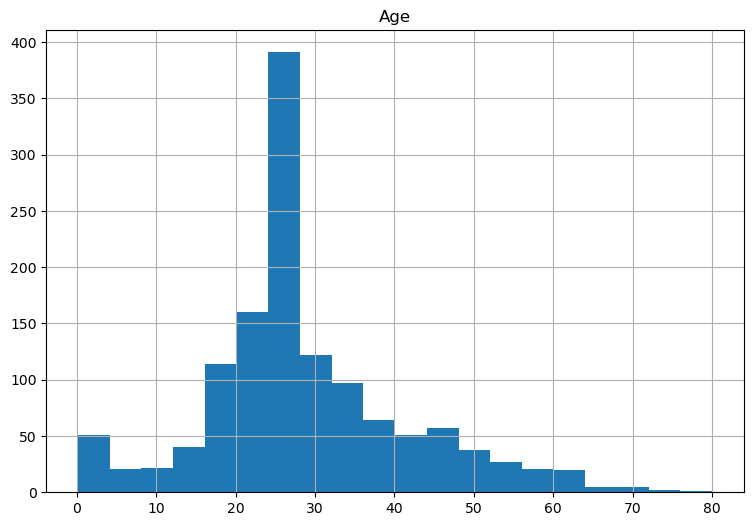

In [ ]:
titanic_train.hist(column='Age',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins